# Exploratory Data Analysis (EDA) version 2 

## House Prices - Advanced Regression Techniques

#### This will be a follow along with Tuatini Godard's notebook on kaggle, linked below

https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook

First import our libraries and create a dataframe from our training data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
df_train = pd.read_csv(r"C:\Users\15402\Documents\House Prices - Advanced Regression Techniques\train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Lets remove features with 30% or less NaN values. Also let us remove Id as it isn't useful

In [4]:
total = df_train.isnull().sum().sort_values(ascending = False)
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [5]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
percent.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

### Combine total and percent columns

In [6]:
missing_data = pd.concat([total,percent], axis = 1, keys =['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### Now let us get rid of the columns that have 30% or more NaN values

In [7]:
df_drop_values = df_train.drop((missing_data[missing_data['Percent']>0.3]).index,1)
del df_drop_values['Id']

print("List of dropped columns: ", end =  " ")
for col in df_train.columns:
    if col not in df_drop_values.columns:
        print(col, end = ", ")
print('\n')
df_train = df_drop_values


List of dropped columns:  Id, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, 



## Another method we could have used as a "shortcut" is the method used in the notebook.
## It looks like this



In [8]:
"""
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2
"""

'\ndf2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]\ndel df2[\'Id\']\nprint("List of dropped columns:", end=" ")\nfor c in df.columns:\n    if c not in df2.columns:\n        print(c, end=", ")\nprint(\'\n\')\ndf = df2\n'

## Now we will look at how housing price 'SalePrice' is distributed...

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


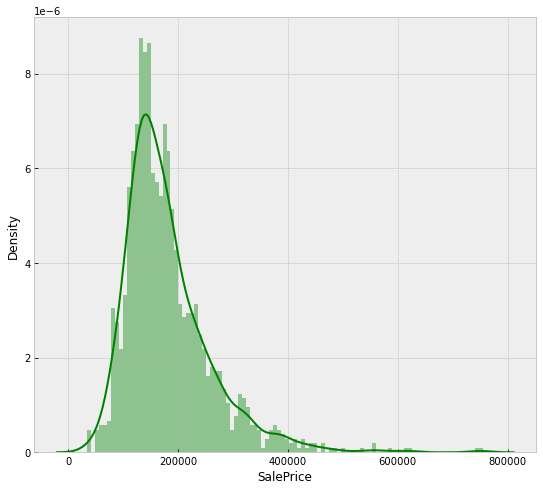

In [9]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.distplot(df_train['SalePrice'], color = 'g', bins = 100, hist_kws = {'alpha':0.4});

## Let us look at the distribution of all the features by plotting them

First we will see our data types. There are two ways. The second way shown is how he did it while the first is how I did it. 

In [15]:
df_train.dtypes.value_counts()

object     38
int64      34
float64     3
dtype: int64

In [16]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

So we have object, int64, and float64 data types

Let us first look at the the numerical data types

In [17]:
df_numerical = df_train.select_dtypes(include = ['float64','int64'])
df_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


So we have 37 numerical columns. Let us plot them.

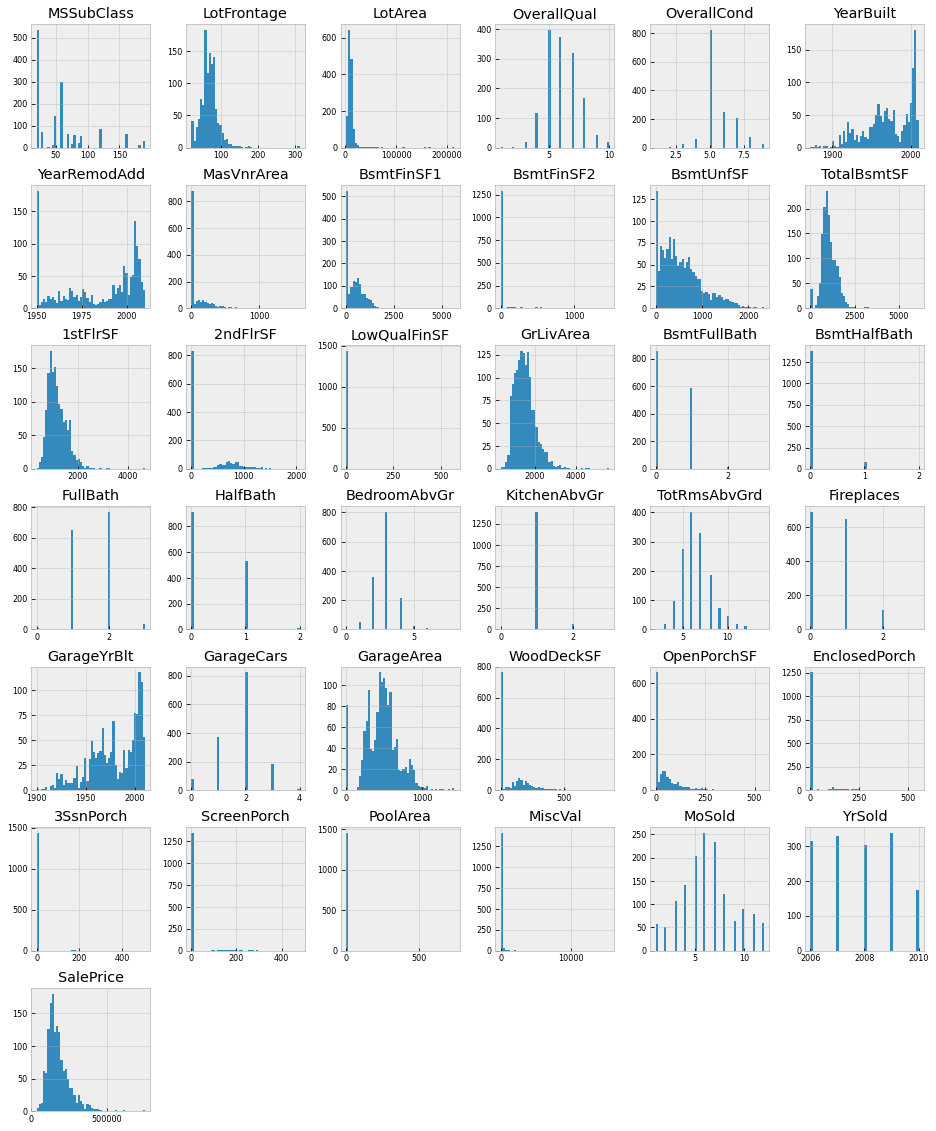

In [18]:
df_numerical.hist(figsize = (16,20), bins = 50, xlabelsize = 8, ylabelsize = 8); #; avoids having the matplotlib verbose info

#### 1stFlrSF, GrLivArea, TotalBsmtSF, and LotFrontage share a similar distribution to SalePrice

## Correlation

### Which features have the strongest correlation to SalePrice? 

In [20]:
df_numerical_correlation = df_numerical.corr()['SalePrice'][:-1] # -1 because the last column is SalePrice

In [23]:
golden_features = df_numerical_correlation[abs(df_numerical_correlation) > 0.5].sort_values(ascending = False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features),golden_features))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


- Now we will plot the numerical features to see which ones have very few or explainable outliers
- Remove the outliers and see which features have a good correlation without their outliers

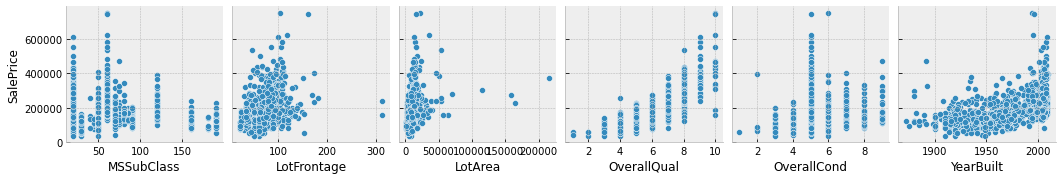

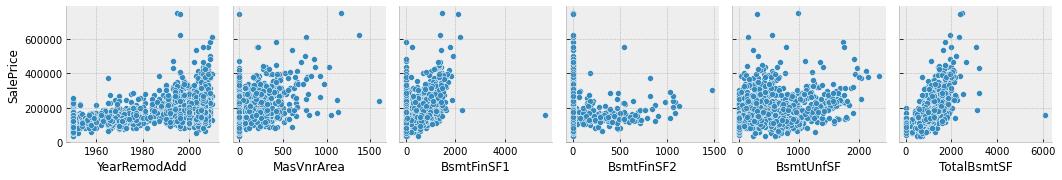

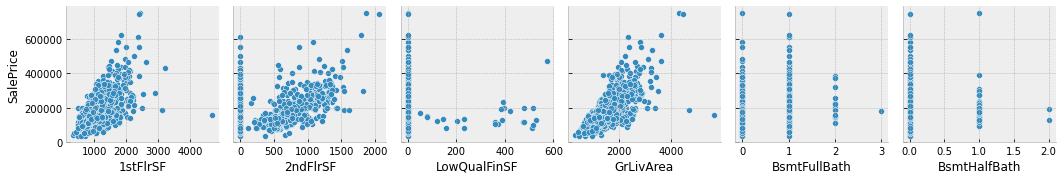

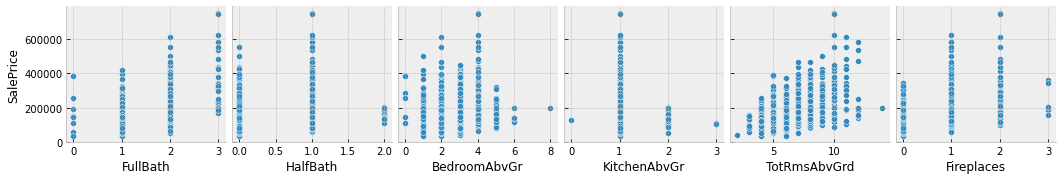

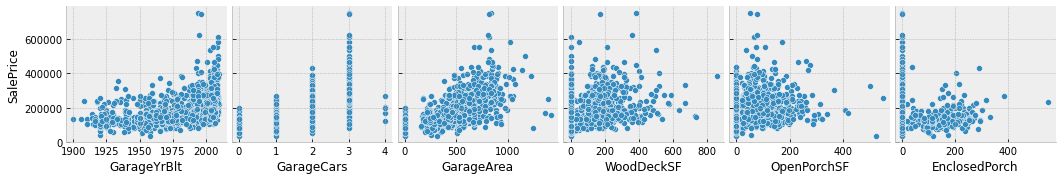

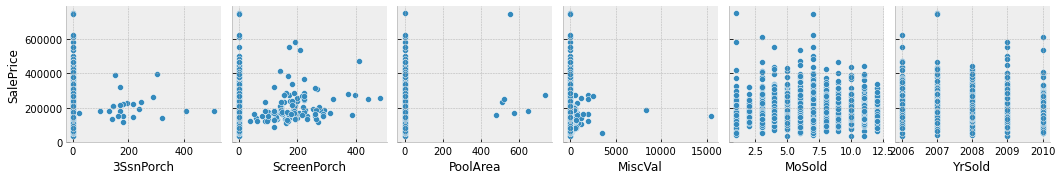

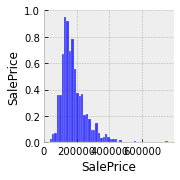

In [28]:
for graph in range(0,len(df_numerical.columns), 6):
    sns.pairplot(data = df_numerical, x_vars = df_numerical.columns[graph:graph+6],
                y_vars = ['SalePrice'])

#### Findings from the above correlation charts

A lot of values are with an x value of 0 indicating that the feature probably does not exist. For example ScreenPorch. 'Yearbuilt', 'OveralQual', '1stFlSF', '2ndFlSF','GrLivArea' all show linear relationships

#### We will no remove all the 0s and repeat the process

In [33]:
import operator 

individual_features_df = []
for i in range(0,len(df_numerical.columns) -1): #-1 because SalePrice is the last column
    tmpDf = df_numerical[[df_numerical.columns[i], 'SalePrice']] 
    tmpDf = tmpDf[tmpDf[df_numerical.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]:feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key =operator.itemgetter(1))
for (key,value) in all_correlations:
    print("{:>15}: {:>15}".format(key,value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

The code above is a pretty good code for wiping away all 0 features in a column. It is a loop. I currently don't really understand how it works though.

In [34]:
golden_features = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features),golden_features))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


### Now lets construct a heatmap to see the feature to feature correlation

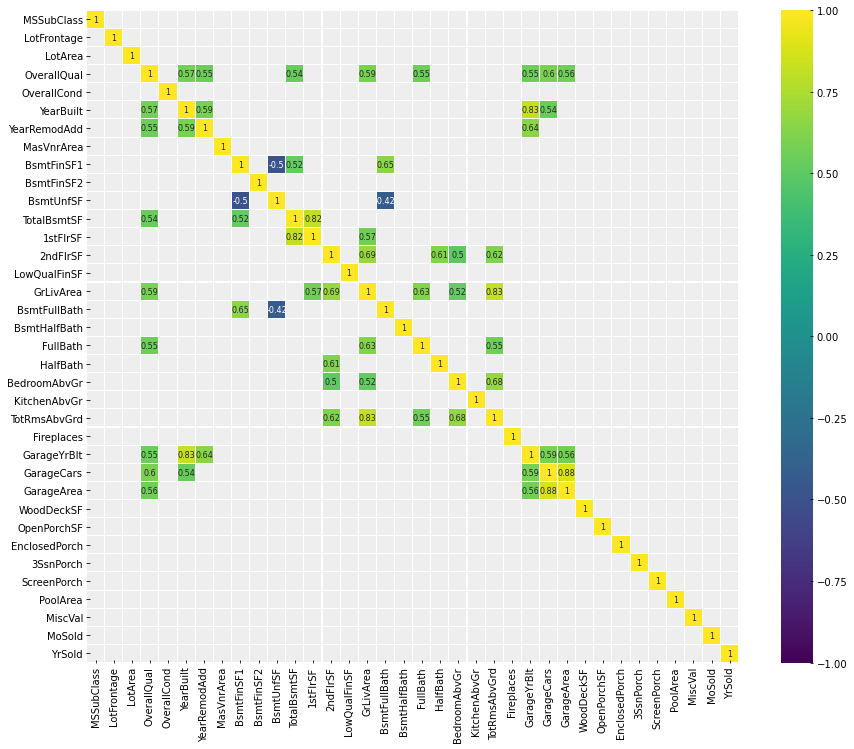

In [39]:
corr = df_numerical.drop('SalePrice', axis =1).corr() #We have already examined the correlations with SalePrice
plt.figure(figsize = (15,12))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap = 'viridis', vmax =1.0, vmin = -1.0, linewidths = 0.1,
           annot = True, annot_kws = {'size':8}, square = True);

## Q -> Q (Quantitative to Quantitative Relationship)

Examine the quantitative features and how they relate to SalePrice. To separate the categorical from quantitative features lets refer ourselves to the **data_description.txt file**. According to this file we end up with the folowing columns:

In [41]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

df_quantitative_values = df_train[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


### So there are 28 features to analyze but lets only analyze the **strongly correlated quantitative features**. The features in the golden_features dataframe created above

In [42]:
features_to_analyze = [x for x in quantitative_features_list if x in golden_features]
features_to_analyze.append('SalePrice')
features_to_analyze

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

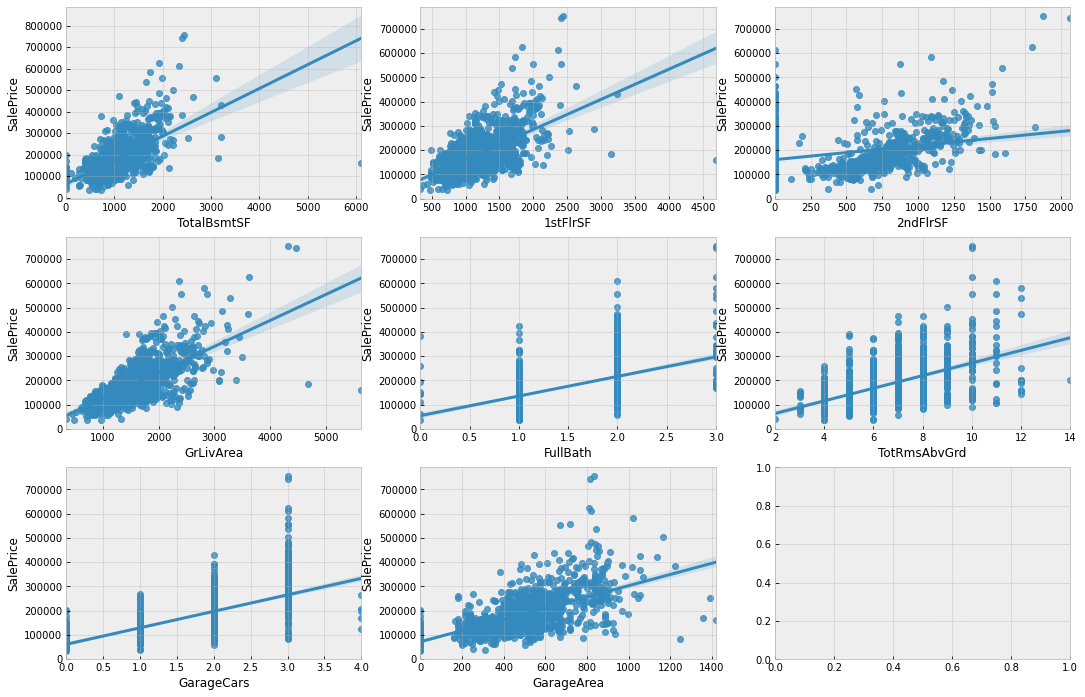

In [45]:
fig, ax = plt.subplots(round(len(features_to_analyze)/3),3,figsize = (18,12))

for i, ax in enumerate(fig.axes):
    if i <len(features_to_analyze) - 1:
        sns.regplot(x=features_to_analyze[i],y='SalePrice', data = df_train[features_to_analyze], ax = ax)

### C to Q (Categorical to Quantitative Relationship)

Lets get all the categorical features of our dataset and see if we can find some insight in them. Instead of opening back our data_description.txt file and checking which data are categorical, lets just remove quantitative_features_list from our entire dataframe.

In [47]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it

categorical_features = [a for a in quantitative_features_list[:-1] + df_train.columns.tolist() if (a not in quantitative_features_list[:-1])
                       or (a not in df_train.columns.tolist())]
df_categ = df_train[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


#### Non numerical features

In [48]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 38 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']




Looking at these features we can see that a lot of them are of the type `Object(O)`. In our data transformation notebook we could use [Pandas categorical functions](http://pandas.pydata.org/pandas-docs/stable/categorical.html) (equivalent to R's factor) to shape our data in a way that would be interpretable for our machine learning algorithm. `ExterQual` for instace could be transformed to an ordered categorical object.


#### Lets plot some of the categorical features

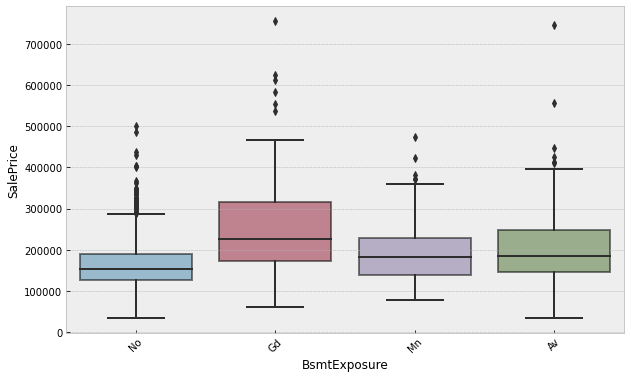

In [52]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = 'BsmtExposure', y ='SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor = "k")
plt.xticks(rotation=45);


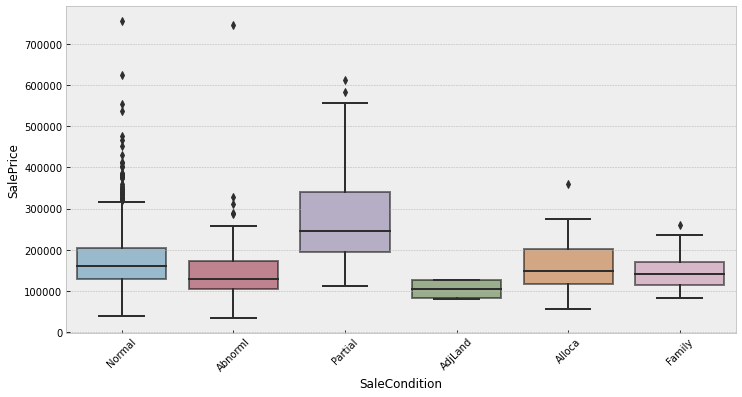

In [56]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_categ)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor ='k')
plt.xticks(rotation=45);

<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
<ipython-input-59-d86bd53857c5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator


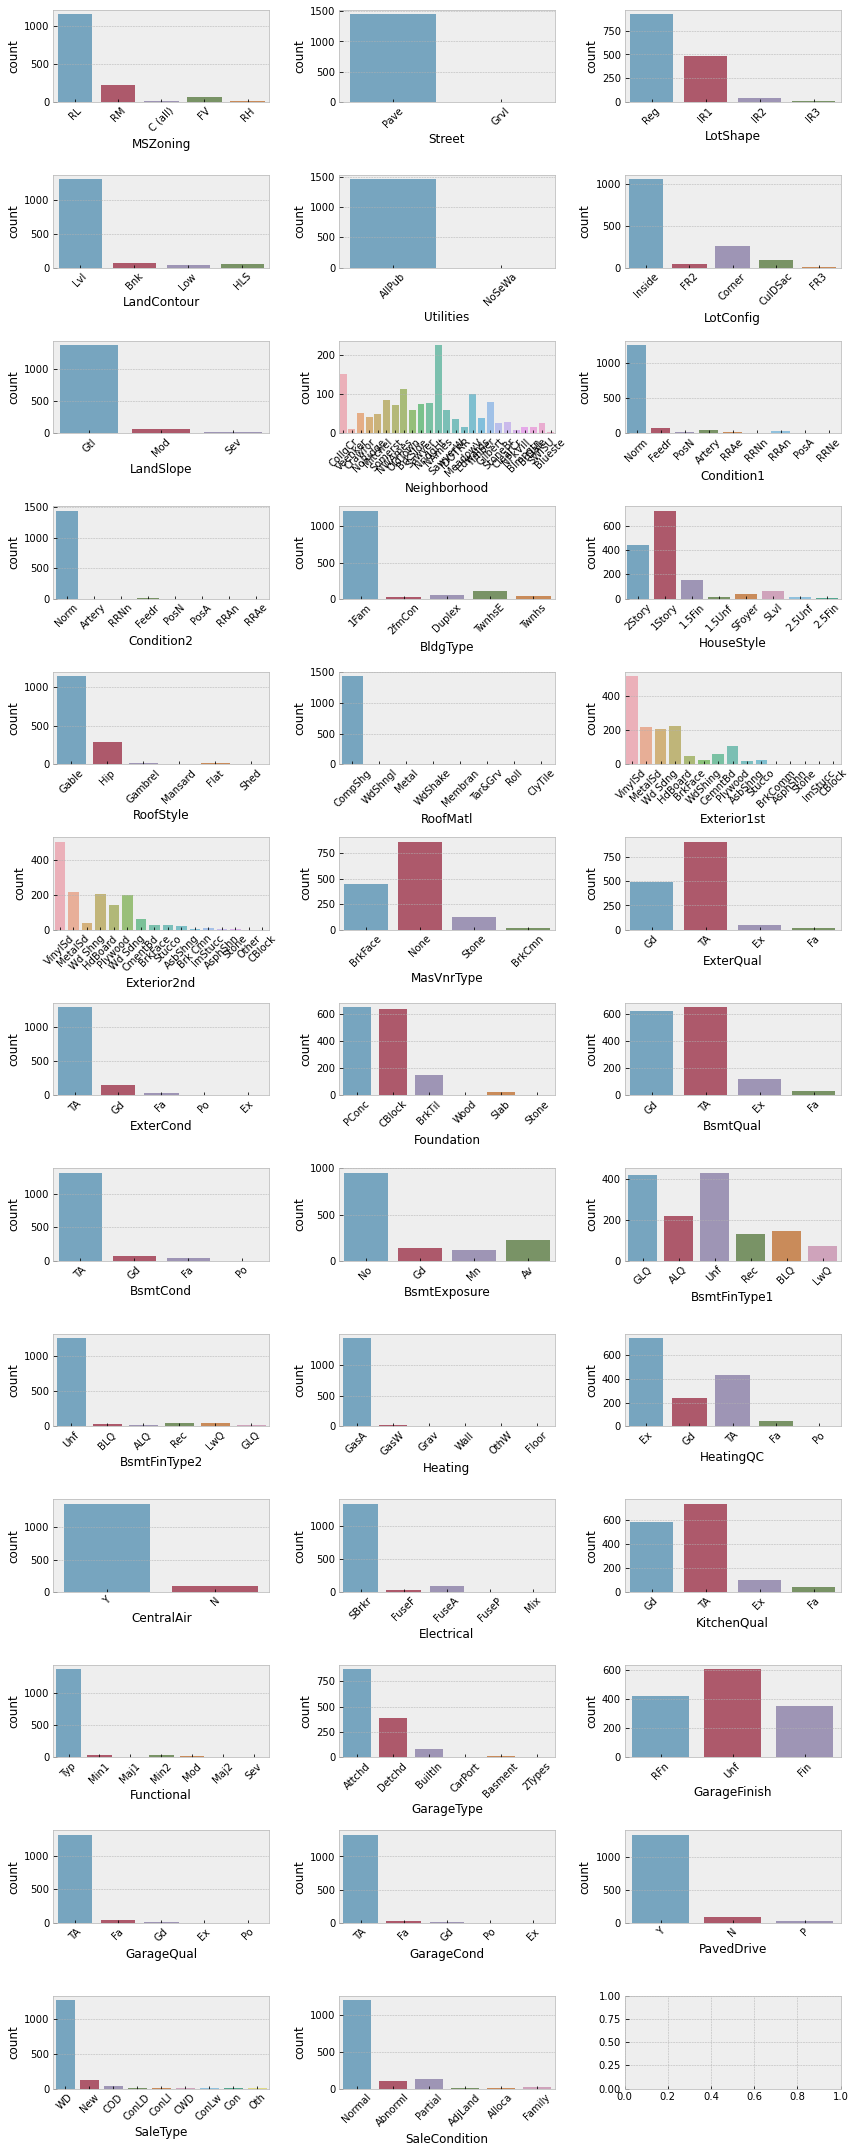

In [59]:
fig, axes = plt.subplots(round(len(df_not_num.columns)/3),3,figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
        sns.countplot(x = df_not_num.columns[i], alpha = 0.7, data = df_not_num, ax = ax);
fig.tight_layout();



We can see that some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`... These features may not be relevant for our predictive model
